In [1]:
import os
import cv2
import tqdm
import shutil
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator

## DATA COLLECTING

In [2]:
# membuat variabel untuk menampung folder data awal
ak_dir = r"./data_gambar/actinic keratosis"
bcc_dir = r"./data_gambar/basal cell carcinoma"
d_dir = r"./data_gambar/dermatofibroma"
m_dir = r"./data_gambar/melanoma"
n_dir = r"./data_gambar/nevus"
pbk_dir = r"./data_gambar/pigmented benign keratosis"
sk_dir = r"./data_gambar/seborrheic keratosis"
scc_dir = r"./data_gambar/squamous cell carcinoma"
vl_dir = r"./data_gambar/vascular lesion"

In [3]:
# membuat variabel untuk list jumlah masing-masing folder
ak_dir_list = os.listdir(ak_dir)
bcc_dir_list = os.listdir(bcc_dir)
d_dir_list = os.listdir(d_dir)
m_dir_list = os.listdir(m_dir)
n_dir_list = os.listdir(n_dir)
pbk_dir_list = os.listdir(pbk_dir)
sk_dir_list = os.listdir(sk_dir)
scc_dir_list = os.listdir(scc_dir)
vl_dir_list = os.listdir(vl_dir)

print('Total List actinic keratosis :', len(ak_dir_list))
print('Total List basal cell carcinoma :', len(bcc_dir_list))
print('Total List dermatofibroma :', len(d_dir_list))
print('Total List melanoma :', len(m_dir_list))
print('Total List nevus :', len(n_dir_list))
print('Total List pigmented benign keratosis :', len(pbk_dir_list))
print('Total List seborrheic keratosis :', len(sk_dir_list))
print('Total List squamous cell carcinoma :', len(scc_dir_list))
print('Total List vascular lesion :', len(vl_dir_list))

Total List actinic keratosis : 130
Total List basal cell carcinoma : 392
Total List dermatofibroma : 111
Total List melanoma : 454
Total List nevus : 373
Total List pigmented benign keratosis : 478
Total List seborrheic keratosis : 80
Total List squamous cell carcinoma : 197
Total List vascular lesion : 142


In [4]:
# membuat folder untuk menyimpan data yang akan digunakan untuk train, validasi & test
if not os.path.exists('./data_used'):
    os.makedirs('./data_used')

In [5]:
dir = './data_used/'

# folder dalam data_used
train = os.path.join(dir, 'train')
validasi = os.path.join(dir, 'validasi')
test = os.path.join(dir, 'test')

# folder train, validasi & test dalam actinic keratosis
ak_dir_train = os.path.join(train, 'actinic keratosis')
ak_dir_validasi = os.path.join(validasi, 'actinic keratosis')
ak_dir_test = os.path.join(test, 'actinic keratosis')

# folder train, validasi & test dalam basal cell carcinoma
bcc_dir_train = os.path.join(train, 'basal cell carcinoma')
bcc_dir_validasi = os.path.join(validasi, 'basal cell carcinoma')
bcc_dir_test = os.path.join(test, 'basal cell carcinoma')

# folder train, validasi & test dalam dermatofibroma
d_dir_train = os.path.join(train, 'dermatofibroma')
d_dir_validasi = os.path.join(validasi, 'dermatofibroma')
d_dir_test = os.path.join(test, 'dermatofibroma')

# folder train, validasi & test dalam melanoma
m_dir_train = os.path.join(train, 'melanoma')
m_dir_validasi = os.path.join(validasi, 'melanoma')
m_dir_test = os.path.join(test, 'melanoma')

# folder train, validasi & test dalam nevus
n_dir_train = os.path.join(train, 'nevus')
n_dir_validasi = os.path.join(validasi, 'nevus')
n_dir_test = os.path.join(test, 'nevus')

# folder train, validasi & test dalam pigmented benign keratosis
pbk_dir_train = os.path.join(train, 'pigmented benign keratosis')
pbk_dir_validasi = os.path.join(validasi, 'pigmented benign keratosis')
pbk_dir_test = os.path.join(test, 'pigmented benign keratosis')

# folder train, validasi & test dalam seborrheic keratosis
sk_dir_train = os.path.join(train, 'seborrheic keratosis')
sk_dir_validasi = os.path.join(validasi, 'seborrheic keratosis')
sk_dir_test = os.path.join(test, 'seborrheic keratosis')

# folder train, validasi & test dalam squamous cell carcinoma
scc_dir_train = os.path.join(train, 'squamous cell carcinoma')
scc_dir_validasi = os.path.join(validasi, 'squamous cell carcinoma')
scc_dir_test = os.path.join(test, 'squamous cell carcinoma')

# folder train, validasi & test dalam vascular lesion
vl_dir_train = os.path.join(train, 'vascular lesion')
vl_dir_validasi = os.path.join(validasi, 'vascular lesion')
vl_dir_test = os.path.join(test, 'vascular lesion')

In [6]:
# variabel masing-masing label
ak_dir_label = []
bcc_dir_label = []
d_dir_label = []
m_dir_label = []
n_dir_label = []
pbk_dir_label = []
sk_dir_label = []
scc_dir_label = []
vl_dir_label = []
label = []

# membuat label pada folder actinic keratosis
for i in tqdm.tqdm(ak_dir_list):
    img = cv2.imread(ak_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    ak_dir_label.append('actinic keratosis')
    label.append('actinic keratosis')

# membuat label pada folder basal cell carcinoma
for i in tqdm.tqdm(bcc_dir_list):
    img = cv2.imread(bcc_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    bcc_dir_label.append('basal cell carcinoma')
    label.append('basal cell carcinoma')

# membuat label pada folder dermatofibroma   
for i in tqdm.tqdm(d_dir_list):
    img = cv2.imread(d_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    d_dir_label.append('dermatofibroma')
    label.append('dermatofibroma')

# membuat label pada folder melanoma    
for i in tqdm.tqdm(m_dir_list):
    img = cv2.imread(m_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    m_dir_label.append('melanoma')
    label.append('melanoma')

# membuat label pada folder actinic nevus   
for i in tqdm.tqdm(n_dir_list):
    img = cv2.imread(n_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    n_dir_label.append('nevus')
    label.append('nevus')
    
# membuat label pada folder pigmented benign keratosis   
for i in tqdm.tqdm(pbk_dir_list):
    img = cv2.imread(pbk_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    pbk_dir_label.append('pigmented benign keratosis')
    label.append('pigmented benign keratosis')

# membuat label pada folder seborrheic keratosis    
for i in tqdm.tqdm(sk_dir_list):
    img = cv2.imread(sk_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    sk_dir_label.append('seborrheic keratosis')
    label.append('seborrheic keratosis')

# membuat label pada folder squamous cell carcinoma                     
for i in tqdm.tqdm(scc_dir_list):
    img = cv2.imread(scc_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    scc_dir_label.append('squamous cell carcinoma')
    label.append('')

# membuat label pada folder vascular lesion                     
for i in tqdm.tqdm(vl_dir_list):
    img = cv2.imread(vl_dir+'/'+i)
    img = cv2.resize(img,(150,150))
    vl_dir_label.append('vascular lesion')
    label.append('vascular lesion')
                     

encoder = LabelEncoder()

# mengencoder label actinic keratosis
ak_dir_label = encoder.fit_transform(ak_dir_label)
ak_dir_label = to_categorical(ak_dir_label)
print('\nLabel actinic keratosis :', ak_dir_label.shape)                   
            
# mengencoder label basal cell carcinoma   
bcc_dir_label = encoder.fit_transform(bcc_dir_label)
bcc_dir_label = to_categorical(bcc_dir_label)
print('Label basal cell carcinoma :', bcc_dir_label.shape)                                         

# mengencoder label dermatofibroma
d_dir_label = encoder.fit_transform(d_dir_label)
d_dir_label = to_categorical(d_dir_label)
print('Label dermatofibroma :', d_dir_label.shape)                    

# mengencoder label melanoma
m_dir_label = encoder.fit_transform(m_dir_label)
m_dir_label = to_categorical(m_dir_label)
print('Label melanoma :', m_dir_label.shape)                 

# mengencoder label nevus
n_dir_label = encoder.fit_transform(n_dir_label)
n_dir_label = to_categorical(n_dir_label)
print('Label nevus :', n_dir_label.shape)                   

# mengencoder label pigmented benign keratosis
pbk_dir_label = encoder.fit_transform(pbk_dir_label)
pbk_dir_label = to_categorical(pbk_dir_label)
print('Label pigmented benign keratosis :', pbk_dir_label.shape)                 

# mengencoder label seborrheic keratosis
sk_dir_label = encoder.fit_transform(sk_dir_label)
sk_dir_label = to_categorical(sk_dir_label)
print('Label seborrheic keratosis :', sk_dir_label.shape)                  

# mengencoder label squamous cell carcinoma
scc_dir_label = encoder.fit_transform(scc_dir_label)
scc_dir_label = to_categorical(scc_dir_label)
print('Label squamous cell carcinoma :', scc_dir_label.shape)                     

# mengencoder label vascular lesion
vl_dir_label = encoder.fit_transform(vl_dir_label)
vl_dir_label = to_categorical(vl_dir_label)
print('Label vascular lesion :', vl_dir_label.shape)
print()

100%|██████████| 142/142 [00:01<00:00, 136.63it/s]


Label actinic keratosis : (130, 1)
Label basal cell carcinoma : (392, 1)
Label dermatofibroma : (111, 1)
Label melanoma : (454, 1)
Label nevus : (373, 1)
Label pigmented benign keratosis : (478, 1)
Label seborrheic keratosis : (80, 1)
Label squamous cell carcinoma : (197, 1)
Label vascular lesion : (142, 1)



## DATA PREPROCESSING

In [7]:
# membuat size split data
train_size = .7
test_size = .3

In [8]:
# membuat split data
ak_train, ak_train_temp = train_test_split(ak_dir_list, train_size=train_size, shuffle=True, random_state=1)
ak_validasi, ak_test = train_test_split(ak_train_temp, test_size=test_size, shuffle=True, random_state=1)

bcc_train, bcc_train_temp = train_test_split(bcc_dir_list, train_size=train_size, shuffle=True, random_state=1)
bcc_validasi, bcc_test = train_test_split(bcc_train_temp, test_size=test_size, shuffle=True, random_state=1)

d_train, d_train_temp = train_test_split(d_dir_list, train_size=train_size, shuffle=True, random_state=1)
d_validasi, d_test = train_test_split(d_train_temp, test_size=test_size, shuffle=True, random_state=1)

m_train, m_train_temp = train_test_split(m_dir_list, train_size=train_size, shuffle=True, random_state=1)
m_validasi, m_test = train_test_split(m_train_temp, test_size=test_size, shuffle=True, random_state=1)

n_train, n_train_temp = train_test_split(n_dir_list, train_size=train_size, shuffle=True, random_state=1)
n_validasi, n_test = train_test_split(n_train_temp, test_size=test_size, shuffle=True, random_state=1)

pbk_train, pbk_train_temp = train_test_split(pbk_dir_list, train_size=train_size, shuffle=True, random_state=1)
pbk_validasi, pbk_test = train_test_split(pbk_train_temp, test_size=test_size, shuffle=True, random_state=1)

sk_train, sk_train_temp = train_test_split(sk_dir_list, train_size=train_size, shuffle=True, random_state=1)
sk_validasi, sk_test = train_test_split(sk_train_temp, test_size=test_size, shuffle=True, random_state=1)

scc_train, scc_train_temp = train_test_split(scc_dir_list, train_size=train_size, shuffle=True, random_state=1)
scc_validasi, scc_test = train_test_split(scc_train_temp, test_size=test_size, shuffle=True, random_state=1)

vl_train, vl_train_temp = train_test_split(vl_dir_list, train_size=train_size, shuffle=True, random_state=1)
vl_validasi, vl_test = train_test_split(vl_train_temp, test_size=test_size, shuffle=True, random_state=1)


print('\nTrain actinic keratosis :', len(ak_train))
print('Validasi actinic keratosis :', len(ak_validasi))
print('Test actinic keratosis :', len(ak_test))
print()

print('Train basal cell carcinoma :', len(bcc_train))
print('Validasi basal cell carcinoma :', len(bcc_validasi))
print('Test basal cell carcinoma :', len(bcc_test))
print()

print('Train dermatofibroma :', len(d_train))
print('Validasi dermatofibroma :', len(d_validasi))
print('Test dermatofibroma :', len(d_test))
print()

print('Train melanoma :', len(m_train))
print('Validasi melanoma :', len(m_validasi))
print('Test melanoma :', len(m_test))
print()

print('Train nevus :', len(n_train))
print('Validasi nevus :', len(n_validasi))
print('Test nevus :', len(n_test))
print()

print('Train pigmented benign keratosis :', len(pbk_train))
print('Validasi pigmented benign keratosis :', len(pbk_validasi))
print('Test pigmented benign keratosis :', len(pbk_test))
print()

print('Train seborrheic keratosis :', len(sk_train))
print('Validasi seborrheic keratosis :', len(sk_validasi))
print('Test seborrheic keratosis :', len(sk_test))
print()

print('Train squamous cell carcinoma :', len(scc_train))
print('Validasi squamous cell carcinoma :', len(scc_validasi))
print('Test squamous cell carcinoma :', len(scc_test))
print()

print('Train vascular lesion :', len(vl_train))
print('Validasi vascular lesion :', len(vl_validasi))
print('Test vascular lesion :', len(vl_test))
print()


Train actinic keratosis : 91
Validasi actinic keratosis : 27
Test actinic keratosis : 12

Train basal cell carcinoma : 274
Validasi basal cell carcinoma : 82
Test basal cell carcinoma : 36

Train dermatofibroma : 77
Validasi dermatofibroma : 23
Test dermatofibroma : 11

Train melanoma : 317
Validasi melanoma : 95
Test melanoma : 42

Train nevus : 261
Validasi nevus : 78
Test nevus : 34

Train pigmented benign keratosis : 334
Validasi pigmented benign keratosis : 100
Test pigmented benign keratosis : 44

Train seborrheic keratosis : 56
Validasi seborrheic keratosis : 16
Test seborrheic keratosis : 8

Train squamous cell carcinoma : 137
Validasi squamous cell carcinoma : 42
Test squamous cell carcinoma : 18

Train vascular lesion : 99
Validasi vascular lesion : 30
Test vascular lesion : 13



In [9]:
# membuat fungsi untuk mengcopy gambar dan memindahakannya kefolder baru
def move_image(list_gambar, folder_lama, folder_baru):
    if not os.path.exists(folder_baru):
        os.makedirs(folder_baru)
    
    for file_name in list_gambar:
        shutil.copy(
            os.path.join(folder_lama, file_name),
            os.path.join(folder_baru, file_name)
        )
    print(f'{len(list_gambar)} Mengcopy Gambar menuju ke- {folder_baru}')

In [10]:
# input untuk mengcopy gambar dan memindahakannya kefolder baru
move_image(ak_train, ak_dir, ak_dir_train)
move_image(ak_validasi, ak_dir, ak_dir_validasi)
move_image(ak_test, ak_dir, ak_dir_test)

move_image(bcc_train, bcc_dir, bcc_dir_train)
move_image(bcc_validasi, bcc_dir, bcc_dir_validasi)
move_image(bcc_test, bcc_dir, bcc_dir_test)

move_image(d_train, d_dir, d_dir_train)
move_image(d_validasi, d_dir, d_dir_validasi)
move_image(d_test, d_dir, d_dir_test)

move_image(m_train, m_dir, m_dir_train)
move_image(m_validasi, m_dir, m_dir_validasi)
move_image(m_test, m_dir, m_dir_test)

move_image(n_train, n_dir, n_dir_train)
move_image(n_validasi, n_dir, n_dir_validasi)
move_image(n_test, n_dir, n_dir_test)

move_image(pbk_train, pbk_dir, pbk_dir_train)
move_image(pbk_validasi, pbk_dir, pbk_dir_validasi)
move_image(pbk_test, pbk_dir, pbk_dir_test)

move_image(sk_train, sk_dir, sk_dir_train)
move_image(sk_validasi, sk_dir, sk_dir_validasi)
move_image(sk_test, sk_dir, sk_dir_test)

move_image(scc_train, scc_dir, scc_dir_train)
move_image(scc_validasi, scc_dir, scc_dir_validasi)
move_image(scc_test, scc_dir, scc_dir_test)

move_image(vl_train, vl_dir, vl_dir_train)
move_image(vl_validasi, vl_dir, vl_dir_validasi)
move_image(vl_test, vl_dir, vl_dir_test)

91 Mengcopy Gambar menuju ke- ./data_used/train\actinic keratosis
27 Mengcopy Gambar menuju ke- ./data_used/validasi\actinic keratosis
12 Mengcopy Gambar menuju ke- ./data_used/test\actinic keratosis
274 Mengcopy Gambar menuju ke- ./data_used/train\basal cell carcinoma
82 Mengcopy Gambar menuju ke- ./data_used/validasi\basal cell carcinoma
36 Mengcopy Gambar menuju ke- ./data_used/test\basal cell carcinoma
77 Mengcopy Gambar menuju ke- ./data_used/train\dermatofibroma
23 Mengcopy Gambar menuju ke- ./data_used/validasi\dermatofibroma
11 Mengcopy Gambar menuju ke- ./data_used/test\dermatofibroma
317 Mengcopy Gambar menuju ke- ./data_used/train\melanoma
95 Mengcopy Gambar menuju ke- ./data_used/validasi\melanoma
42 Mengcopy Gambar menuju ke- ./data_used/test\melanoma
261 Mengcopy Gambar menuju ke- ./data_used/train\nevus
78 Mengcopy Gambar menuju ke- ./data_used/validasi\nevus
34 Mengcopy Gambar menuju ke- ./data_used/test\nevus
334 Mengcopy Gambar menuju ke- ./data_used/train\pigmented b

In [11]:
# melakukan augmentasi data

# membuat datagen untuk mendeklarasikan ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [12]:
# mengambil dataset melalui datagen yang telah dibuat
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(150, 150),
    batch_size=64,
    shuffle=True,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validasi,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 1646 images belonging to 9 classes.
Found 493 images belonging to 9 classes.
Found 218 images belonging to 9 classes.


## DATA VISUALISASI

In [13]:
#melihat dimensi dari train generator 
x_train, y_train = train_generator.next()
print(x_train.shape, y_train.shape)

(64, 150, 150, 3) (64, 9)


In [14]:
#melihat kelas mode dari train generator
train_generator.class_mode

'categorical'

In [15]:
#melihat nama kelas 
nama_kelas = train_generator.class_indices
print(nama_kelas)

{'actinic keratosis': 0, 'basal cell carcinoma': 1, 'dermatofibroma': 2, 'melanoma': 3, 'nevus': 4, 'pigmented benign keratosis': 5, 'seborrheic keratosis': 6, 'squamous cell carcinoma': 7, 'vascular lesion': 8}


In [16]:
#melihat jenis file
jenis_file = pathlib.Path('D:\Praktikum SMSTR 4\PA_KB\data_used\train\actinic keratosis\actinic_keratosis (1).jpg').suffix
print("jenis_file: ", jenis_file)

jenis_file:  .jpg


In [17]:
#melihat total gambar dari masing2 folder gambar
print("Total actinic keratosis :", len(ak_dir_list))
print("Total basal cell carcinoma :", len(bcc_dir_list))
print("Total dermatofibroma :", len(d_dir_list))
print("Total melanoma :", len(m_dir_list))
print("Total nevus :", len(n_dir_list))
print("Total pigmented benign keratosis :", len(pbk_dir_list))
print("Total seborrheic keratosis :", len(sk_dir_list))
print("Total squamous cell carcinoma :", len(scc_dir_list))
print("Total vascular lesion :", len(vl_dir_list))

Total actinic keratosis : 130
Total basal cell carcinoma : 392
Total dermatofibroma : 111
Total melanoma : 454
Total nevus : 373
Total pigmented benign keratosis : 478
Total seborrheic keratosis : 80
Total squamous cell carcinoma : 197
Total vascular lesion : 142


In [18]:
#membuat variabel untuk menyimpan data yang akan digunakan
root_path = r'data_used'
source_path1 = os.path.join(root_path, 'train')
source_path2 = os.path.join(root_path, 'validasi')
source_path3 = os.path.join(root_path, 'test')

#membuat fungsi untuk mengambil isi dalam direktori
dataset_info1 = {}
for label in os.listdir(source_path1):
    dataset_info1[label] = [file for file in os.listdir(
        os.path.join(source_path1, label)
    )]

dataset_info2 = {}
for label in os.listdir(source_path2):
    dataset_info2[label] = [file for file in os.listdir(
        os.path.join(source_path2, label)
    )]

dataset_info3 = {}
for label in os.listdir(source_path3):
    dataset_info3[label] = [file for file in os.listdir(
        os.path.join(source_path3, label)
    )]

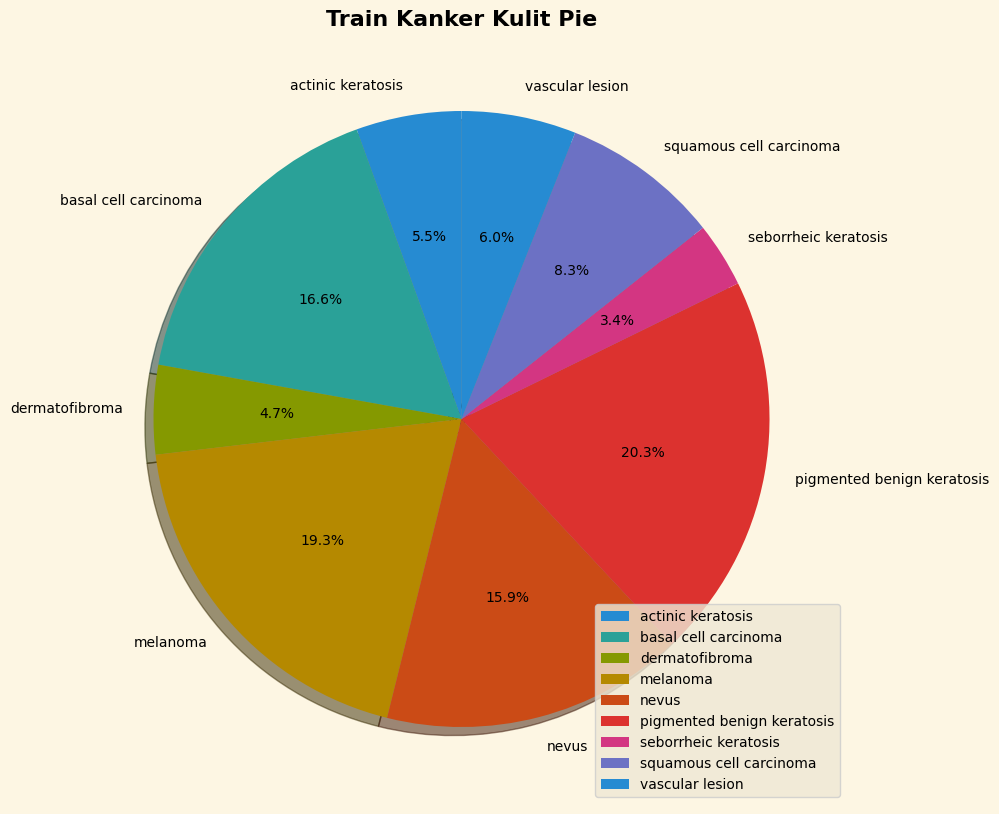

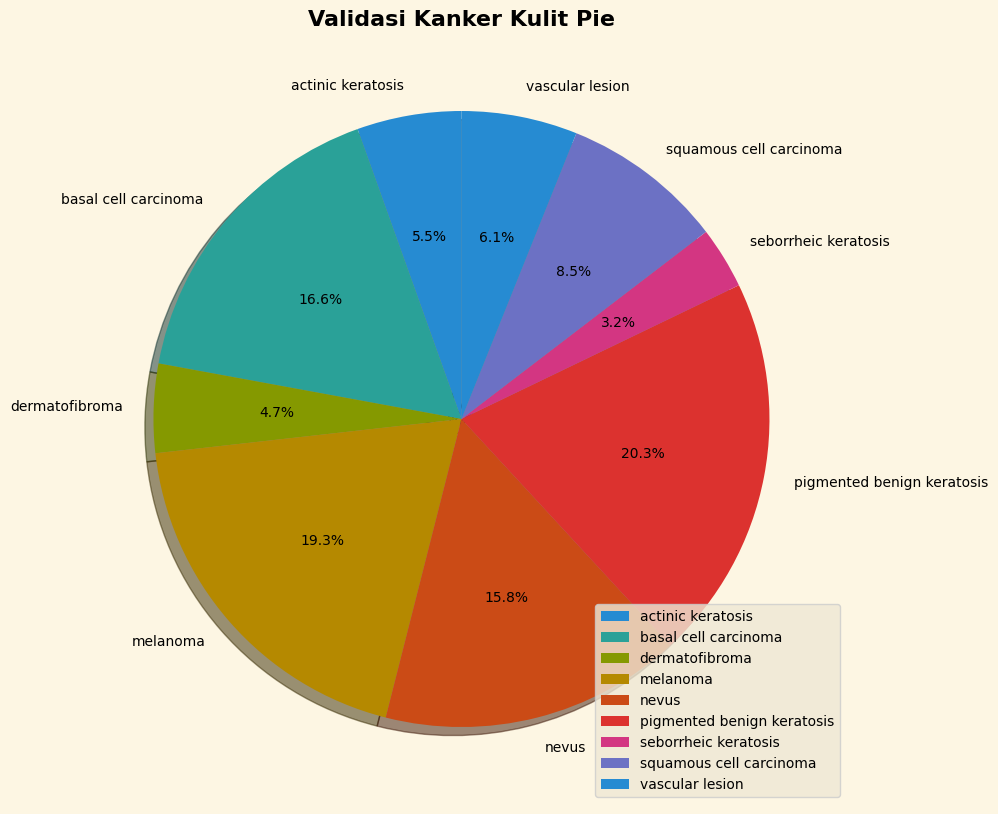

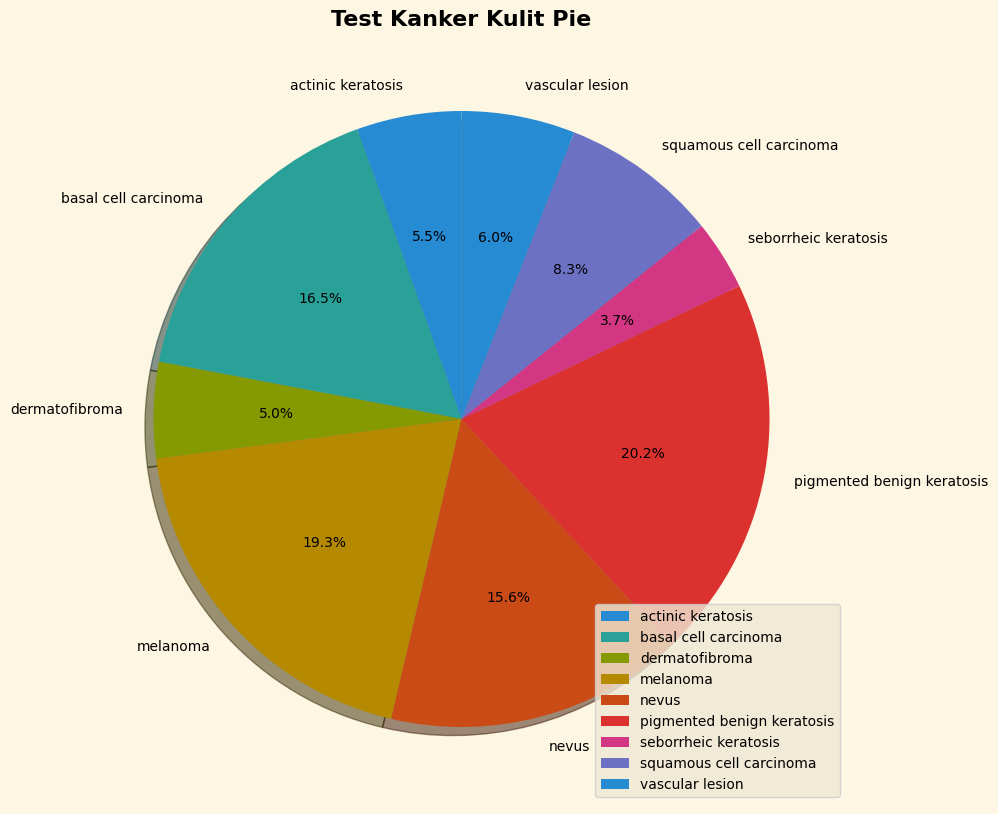

In [19]:
#membuat tampilan grafik menggunakan pie chart
plt.style.use('Solarize_Light2')

plt.figure(1, figsize=(10,10))
plt.pie([len(files) for files in dataset_info1.values()],
        labels = dataset_info1.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0, 0, 0, 0, 0],
        shadow=True)
plt.title('Train Kanker Kulit Pie', fontweight='bold')
plt.legend(loc = "lower right")

plt.figure(2, figsize=(10,10))
plt.pie([len(files) for files in dataset_info2.values()],
        labels = dataset_info2.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0, 0, 0, 0, 0],
        shadow=True)
plt.title('Validasi Kanker Kulit Pie', fontweight='bold')
plt.legend(loc = "lower right")

plt.figure(3, figsize=(10,10))
plt.pie([len(files) for files in dataset_info3.values()],
        labels = dataset_info3.keys(),
        startangle=90,
        autopct='%.1f%%',
        explode=[0, 0, 0, 0, 0, 0, 0, 0, 0],
        shadow=True)
plt.title('Test Kanker Kulit Pie', fontweight='bold')
plt.legend(loc = "lower right")
plt.show()

In [20]:
#membuat variabel image dan label dari variabel train generator
image, label = train_generator.next()

In [21]:
#membuat variabel labels
labels = ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']

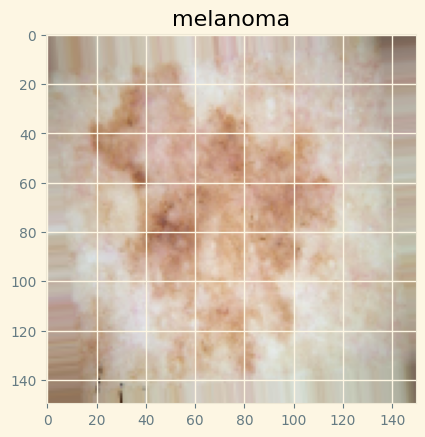

In [22]:
#membuat visualisasi 
x = 0
plt.title(labels[tf.argmax(label[x])])
plt.imshow(image[x])

## Modeling

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=[150, 150, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax'),
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 64)                9

In [25]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## Evaluasi

In [26]:
hasil = model.fit(train_generator, validation_data= val_generator, epochs=35)

Epoch 1/35
26/26 [==============================] - 82s 3s/step - loss: 2.0937 - accuracy: 0.1683 - val_loss: 2.0336 - val_accuracy: 0.1927
Epoch 2/35
26/26 [==============================] - 60s 2s/step - loss: 1.9657 - accuracy: 0.2527 - val_loss: 1.9073 - val_accuracy: 0.3408
Epoch 3/35
26/26 [==============================] - 60s 2s/step - loss: 1.8048 - accuracy: 0.3548 - val_loss: 1.6725 - val_accuracy: 0.4219
Epoch 4/35
26/26 [==============================] - 61s 2s/step - loss: 1.6099 - accuracy: 0.4526 - val_loss: 1.5988 - val_accuracy: 0.4746
Epoch 5/35
26/26 [==============================] - 60s 2s/step - loss: 1.4843 - accuracy: 0.5049 - val_loss: 1.4829 - val_accuracy: 0.4909
Epoch 6/35
26/26 [==============================] - 69s 3s/step - loss: 1.4139 - accuracy: 0.5043 - val_loss: 1.4467 - val_accuracy: 0.4828
Epoch 7/35
26/26 [==============================] - 63s 2s/step - loss: 1.3926 - accuracy: 0.5103 - val_loss: 1.3816 - val_accuracy: 0.5132
Epoch 8/35
26/26 [==

In [27]:
accuracy_train = hasil.history['accuracy']
val_accuracy_train = hasil.history['val_accuracy']
loss_train =  hasil.history['loss']
val_loss = hasil.history['val_loss']
x = range(len(accuracy_train))

Text(0.5, 1.0, 'loss')

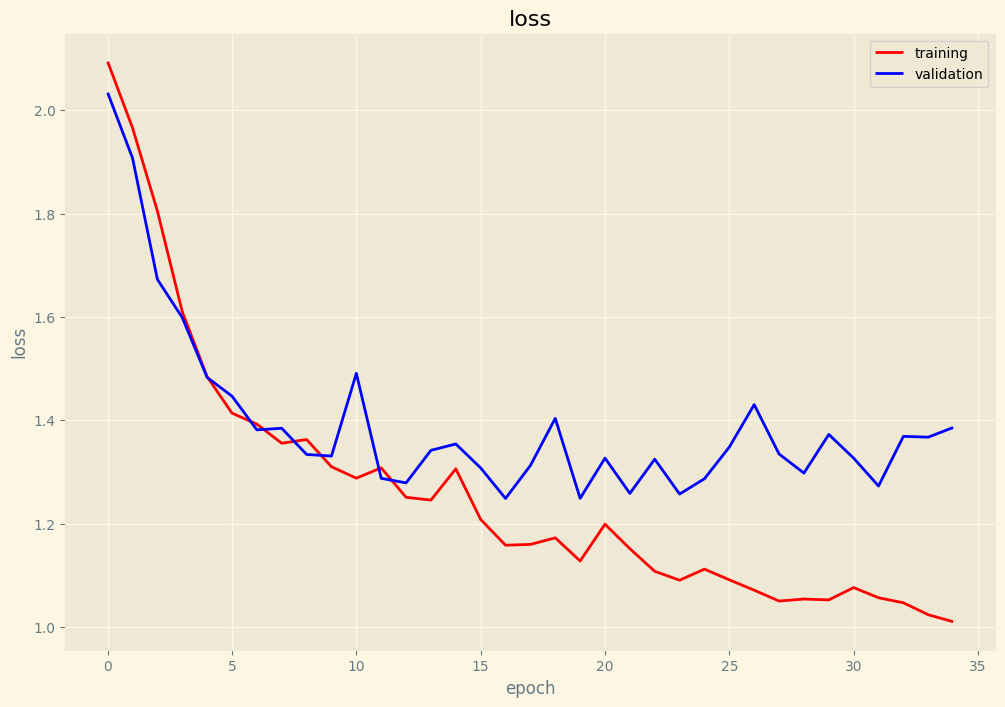

In [28]:
plt.figure(2, figsize=(12,8))
plt.plot(x, loss_train, c='r', label='training')
plt.plot(x, val_loss, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

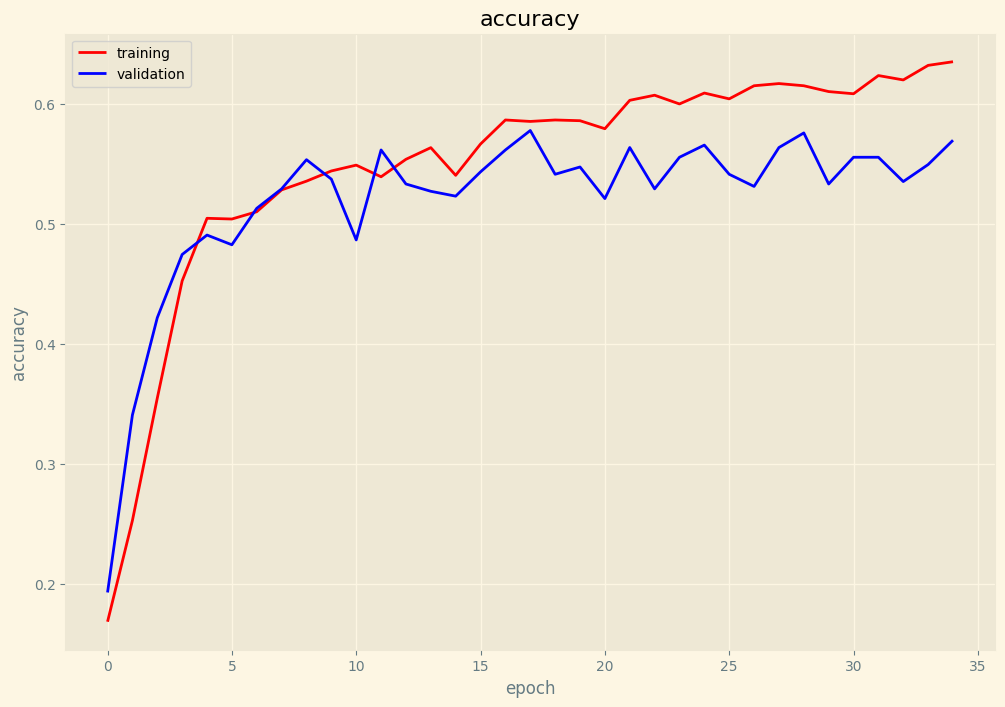

In [29]:
plt.figure(1, figsize=(12,8))
plt.plot(x, accuracy_train, c='r', label='training')
plt.plot(x, val_accuracy_train, c='b', label='validation')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy')

In [30]:
evaluasi = model.evaluate(test_generator)

7/7 [==============================] - 5s 718ms/step - loss: 1.4646 - accuracy: 0.5000


In [31]:
print("Hasil Evaluasi : ", evaluasi)

Hasil Evaluasi :  [1.4645764827728271, 0.5]


In [32]:
predict = model.predict(test_generator)

7/7 [==============================] - 4s 510ms/step


In [33]:
predict = np.argmax(predict,axis=1)
predict.shape

(218,)

In [34]:
predict2 = LabelEncoder().fit_transform(predict)
predict2 = to_categorical(predict2)

In [35]:
predict2.shape

(218, 8)

In [36]:
label = np.array(label[8100:-8060])

In [38]:
label = LabelEncoder().fit_transform(label)
label = to_categorical(label)

ValueError: y should be a 1d array, got an array of shape (0, 9) instead.